# Use the prediction endpoint
This notebook demonstrates how use the REST prediction endpoint to remotely access a custom image classification model you trained in the previous step of the lab. 


## Install Custom Vision Service SDK
First, we will install Custom Vision Service SDK

In [8]:
# Install Custom Vision Service SDK  in the current Jupyter kernel
import sys
!{sys.executable} -m pip install azure-cognitiveservices-vision-customvision


    100% |████████████████████████████████| 92kB 6.3MB/s 
mxnet-model-server 0.4 requires mxnet-mkl>=1.2, which is not installed.
blobxfer 1.3.1 has requirement requests==2.19.1, but you'll have requests 2.18.4 which is incompatible.
blobxfer 1.3.1 has requirement ruamel.yaml==0.15.41, but you'll have ruamel-yaml 0.15.35 which is incompatible.
mxnet-model-server 0.4 has requirement onnx==1.1.1, but you'll have onnx 1.2.2 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Get the prediction key and project id
Before you can access the endpoint you need to configure project id and prediction key.

To get the keys, navigate to the Custom Vision web page and select the gear icon in the upper right. In the Accounts section, copy the value from the Prediction Key field.

![Keys](https://github.com/Microsoft/MTC_AzureAILabs/raw/master/Lab01-CustomVisionService/Exercise2-Predict/images/img13.PNG)



Change the values below to your project's keys

In [9]:
PREDICTION_KEY =  '38a72883faa64ce1a82cb5497c2f5366'
PROJECT_ID = '25bb6caf-646e-47ee-806b-126da72fa681'

Download test images

In [3]:
%%sh
wget https://raw.githubusercontent.com/jakazmie/AIDays/master/IntelligentApps/01-CustomVisionService-ImageClassification/samples/imagelist.txt
wget -i imagelist.txt
ls

README.md
barren-1.png
cultivated-1.png
developed-1.png
imagelist.txt
images
predict.ipynb
predict.md
samples
train.md


--2018-09-25 14:52:08--  https://raw.githubusercontent.com/jakazmie/AIDays/master/IntelligentApps/01-CustomVisionService-ImageClassification/samples/imagelist.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386 [text/plain]
Saving to: ‘imagelist.txt’

     0K                                                       100% 11.2M=0s

2018-09-25 14:52:08 (11.2 MB/s) - ‘imagelist.txt’ saved [386/386]

--2018-09-25 14:52:08--  https://github.com/jakazmie/AIDays/raw/master/IntelligentApps/01-CustomVisionService-ImageClassification/samples/barren-1.png
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jakazmie/AIDays/master

## Display test images

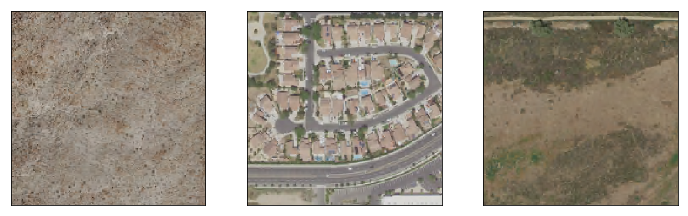

In [7]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

images_dir = 'samples'
images = [os.path.join(images_dir, file) for file in os.listdir(images_dir)]

figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image_path in zip(axis.flat[0:], images):
    image = Image.open(image_path)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)


## Call the prediction endpoint

In [11]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

def classify_image(image_path):
    predictor = prediction_endpoint.PredictionEndpoint(PREDICTION_KEY)
    with open(image_path, mode='rb') as image:
      result = predictor.predict_image(PROJECT_ID, image)
    
    probs = [prediction.probability for prediction in result.predictions]
    max_prob = max(probs)
    max_index = probs.index(max_prob)
    tag = result.predictions[max_index].tag_name

    return tag, max_prob
    

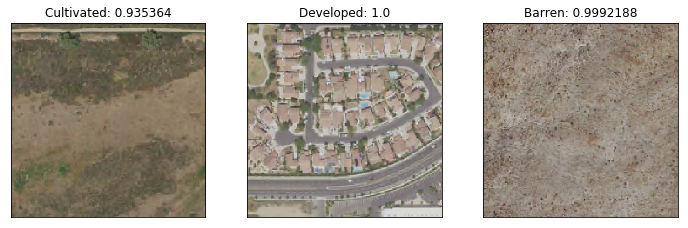

In [12]:
figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image_path in zip(axis.flat[0:], images):
    tag, prob = classify_image(image_path)
    ax.set_title(tag + ': ' + str(prob))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    image = Image.open(image_path)
    ax.imshow(image)

